Problem 1 — Dataset: bank.csv
Step 1 — Load Dataset

In [ ]:
import pandas as pd

bank = pd.read_csv("bank.csv")
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Step 2 — Check info & inspect
(a) Columns with dtype = object

In [ ]:
bank.info()

object_cols = bank.select_dtypes(include='object').columns
object_cols


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

(b) Unique values of object columns

In [ ]:
for col in object_cols:
    print(f"\nColumn: {col}")
    print(bank[col].unique())



Column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column: marital
['married' 'single' 'divorced']

Column: education
['tertiary' 'secondary' 'unknown' 'primary']

Column: default
['no' 'yes']

Column: housing
['yes' 'no']

Column: loan
['no' 'yes']

Column: contact
['unknown' 'cellular' 'telephone']

Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column: poutcome
['unknown' 'failure' 'other' 'success']

Column: y
['no' 'yes']


(c) Null values in each column

In [ ]:
bank.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Step 3 — Drop all object columns & save new CSV

In [ ]:
bank_numeric = bank.drop(columns=object_cols)
bank_numeric.to_csv("banknumericdata.csv", index=False)
bank_numeric.head()


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


Step 4 — Read new CSV & show summary statistics

In [ ]:
bank_new = pd.read_csv("banknumericdata.csv")
bank_new.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2 — Dataset: medical_students_dataset.csv
Step 1 — Load dataset

In [ ]:
med = pd.read_csv("medical_students_dataset.csv")
med.head()


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


Step 2 — Check columns with missing values

In [ ]:
med.info()
med.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


Step 3 — Fill missing values

Replace numeric missing values with median

In [ ]:
import pandas as pd
med = pd.read_csv("medical_students_dataset.csv")
print("=== HEAD ===")
print(med.head())

print("\n=== INFO ===")
med.info()

print("\n=== NULL VALUES BEFORE IMPUTATION ===")
print(med.isnull().sum())

#IMPUTE NUMERIC MISSING VALUES WITH MEDIAN
numeric_cols = med.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    if med[col].isnull().sum() > 0:
        med[col] = med[col].fillna(med[col].median())
        print(f"Filled NUMERIC column '{col}' with MEDIAN")


#IMPUTE CATEGORICAL MISSING VALUES WITH MODE
categorical_cols = med.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if med[col].isnull().sum() > 0:
        med[col] = med[col].fillna(med[col].mode()[0])
        print(f"Filled CATEGORICAL column '{col}' with MODE")

#CHECK NULL VALUES AGAIN
print("\n=== NULL VALUES AFTER IMPUTATION ===")
print(med.isnull().sum())

#REMOVE DUPLICATES
dup_count = med.duplicated().sum()
print("\nDuplicate rows found:", dup_count)

med = med.drop_duplicates()

print("Shape after removing duplicates:", med.shape)


=== HEAD ===
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165230 entries, 

3.2 – Titanic Dataset (Titanic-Dataset.csv)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = pd.read_csv("Titanic-Dataset.csv")
print("=== HEAD ===")
print(titanic.head())


=== HEAD ===
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN 

Problem 1 – First class, Fare stats

In [ ]:
sub = titanic[['Name','Pclass','Sex','Age','Fare','Survived']]
first_class = sub[sub['Pclass'] == 1]

mean_fare = first_class['Fare'].mean()
median_fare = first_class['Fare'].median()
max_fare = first_class['Fare'].max()
min_fare = first_class['Fare'].min()

print("Mean Fare (Pclass=1):", mean_fare)
print("Median Fare (Pclass=1):", median_fare)
print("Max Fare (Pclass=1):", max_fare)
print("Min Fare (Pclass=1):", min_fare)


Mean Fare (Pclass=1): 84.1546875
Median Fare (Pclass=1): 60.287499999999994
Max Fare (Pclass=1): 512.3292
Min Fare (Pclass=1): 0.0


Problem 2 – Null in Age, then drop

In [ ]:
null_age_count = first_class['Age'].isnull().sum()
print("Null values in Age (first class subset):", null_age_count)

cleaned_first_class = first_class.dropna(subset=['Age'])
print("Rows after dropping null Age:", cleaned_first_class.shape[0])


Null values in Age (first class subset): 30
Rows after dropping null Age: 186


Problem 3 — One-Hot Encoding for Embarked

In [ ]:
import pandas as pd

# Step 1 — Load dataset
titanic = pd.read_csv("Titanic-Dataset.csv")
print("=== ORIGINAL DATASET (HEAD) ===")
print(titanic.head())

# Step 2 — One-hot encode 'Embarked'
dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
print("\n=== ONE-HOT ENCODED COLUMNS ===")
print(dummies.head())

# Step 3 — Add dummy columns
titanic = pd.concat([titanic, dummies], axis=1)

# Step 4 — Drop old column
titanic = titanic.drop(columns=['Embarked'])

# Step 5 — Show final dataframe
print("\n=== MODIFIED DATAFRAME (HEAD) ===")
print(titanic.head())



=== ORIGINAL DATASET (HEAD) ===
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373

Problem 4 – Survival by Sex + plot

=== MEAN SURVIVAL BY SEX ===
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


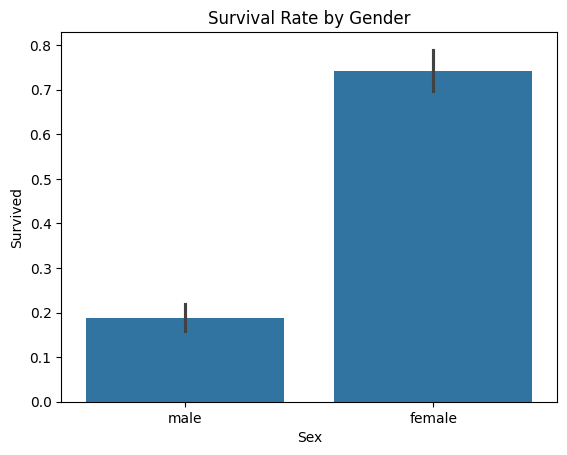

In [ ]:
print("=== MEAN SURVIVAL BY SEX ===")
print(titanic.groupby('Sex')['Survived'].mean())

sns.barplot(data=titanic, x='Sex', y='Survived')
plt.title("Survival Rate by Gender")
plt.show()


Problem 5 – Survival by Sex & Embarked

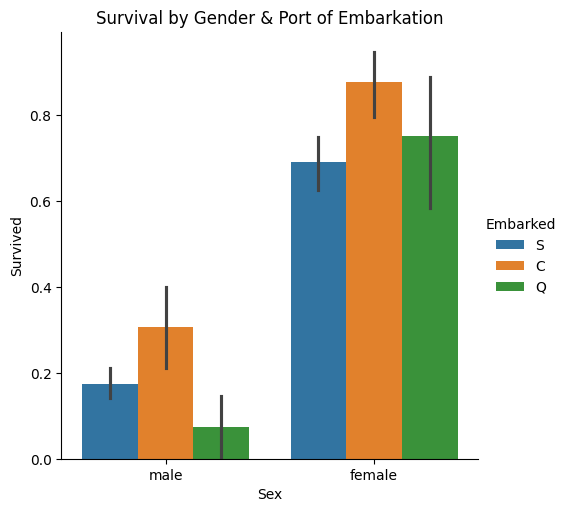

In [18]:
titanic2 = pd.read_csv("Titanic-Dataset.csv")

import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(data=titanic2, x='Sex', y='Survived', hue='Embarked', kind='bar')
plt.title("Survival by Gender & Port of Embarkation")
plt.show()


Problem 6 (Optional) – Age group & Pclass

=== MEAN SURVIVAL BY PCLASS & AGE GROUP ===
Pclass  AgeGroup     
1       (0.419, 19.0]    0.809524
        (19.0, 25.0]     0.761905
        (25.0, 31.8]     0.666667
        (31.8, 41.0]     0.777778
        (41.0, 80.0]     0.506667
2       (0.419, 19.0]    0.742857
        (19.0, 25.0]     0.400000
        (25.0, 31.8]     0.416667
        (31.8, 41.0]     0.461538
        (41.0, 80.0]     0.363636
3       (0.419, 19.0]    0.333333
        (19.0, 25.0]     0.197674
        (25.0, 31.8]     0.283582
        (31.8, 41.0]     0.166667
        (41.0, 80.0]     0.088235
Name: Survived, dtype: float64


/tmp/ipython-input-4117586514.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic.groupby(['Pclass','AgeGroup'])['Survived'].mean())


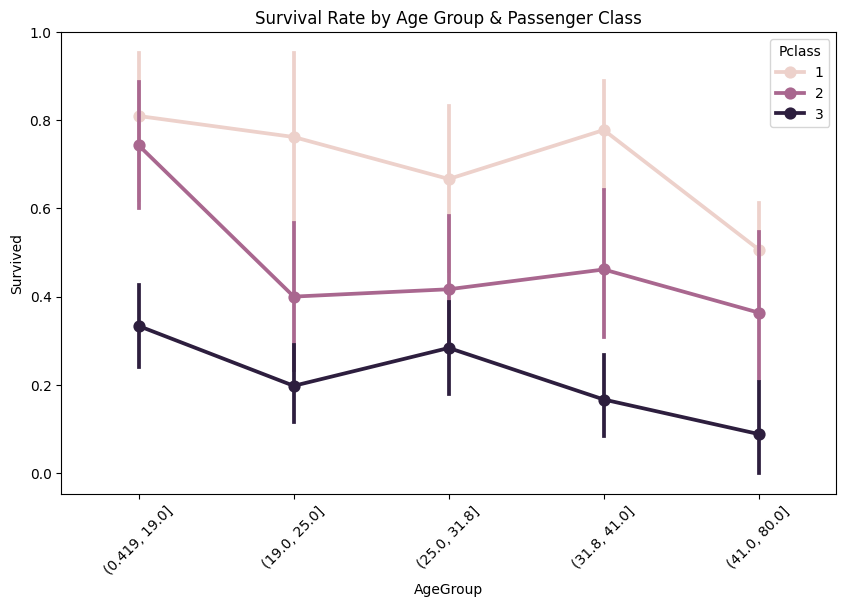

In [19]:
titanic['AgeGroup'] = pd.qcut(titanic['Age'], 5)

print("=== MEAN SURVIVAL BY PCLASS & AGE GROUP ===")
print(titanic.groupby(['Pclass','AgeGroup'])['Survived'].mean())

plt.figure(figsize=(10,6))
sns.pointplot(data=titanic, x='AgeGroup', y='Survived', hue='Pclass')
plt.xticks(rotation=45)
plt.title("Survival Rate by Age Group & Passenger Class")
plt.show()
